# ChatGPTによるNetworkXを用いたネットワークモデルの生成

対応する動画：[ChatGPTによるNetworkXを用いたネットワークモデルの生成【研究で使うPython #80】](https://youtu.be/5anAy4BEvZs)

動画のプレイリスト：[NetworkXによるネットワーク分析](https://youtube.com/playlist?list=PLw5AEs-T7pLHBRJRinkqTRv7qNO-_P3Rj)

## Erdős–Rényiのランダムグラフ

### 組み込み関数を使った場合

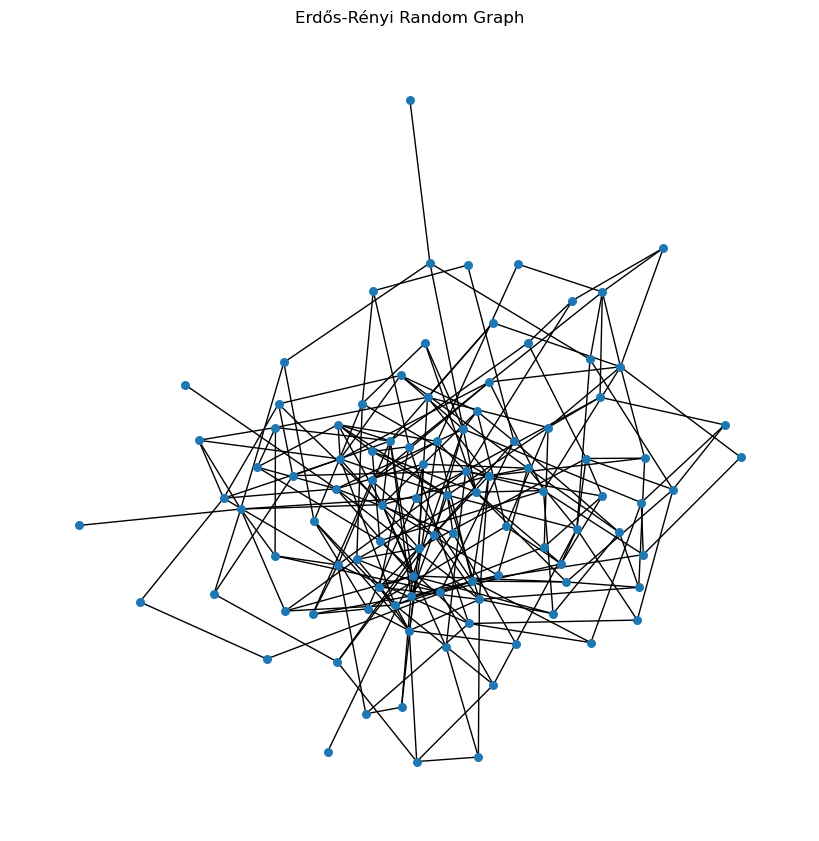

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# ノード数とエッジの確率を指定
num_nodes = 100
edge_probability = 0.05

# Erdős-Rényiランダムグラフを生成
G = nx.erdos_renyi_graph(num_nodes, edge_probability)

# グラフの描画（オプション）
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=False, node_size=30)
plt.title("Erdős-Rényi Random Graph")
plt.show()

### 使わなかった場合

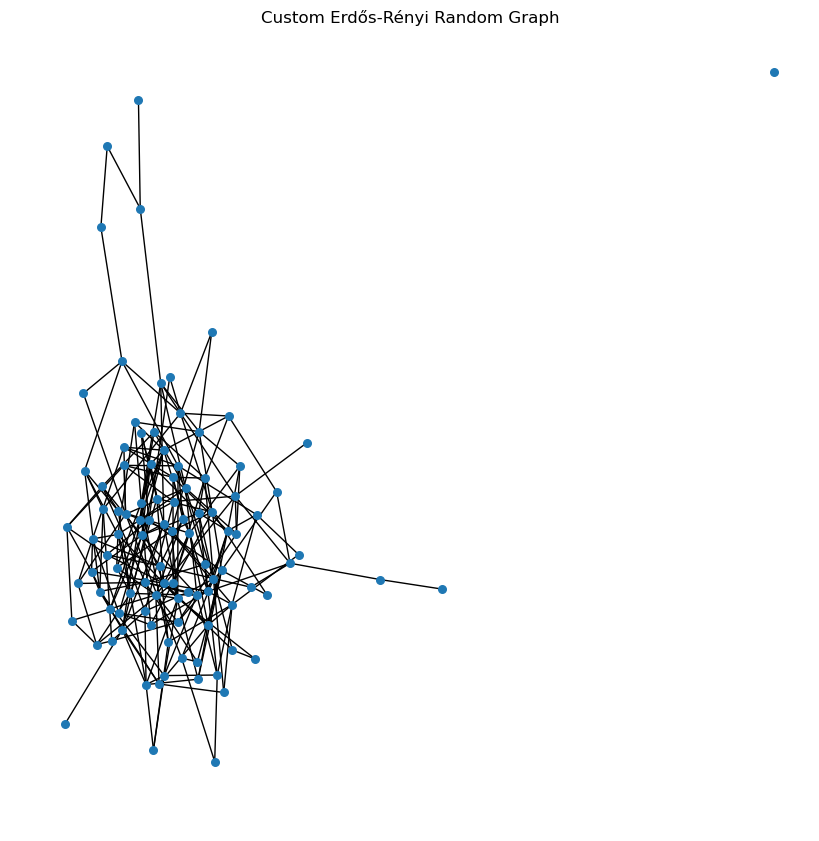

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# ノード数とエッジの確率を指定
num_nodes = 100
edge_probability = 0.05

# 空のグラフを作成
G = nx.Graph()

# ノードを追加
G.add_nodes_from(range(num_nodes))

# 各ノードの組み合わせに対してエッジを追加するかどうかを確率的に決定
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if np.random.rand() < edge_probability:
            G.add_edge(i, j)

# グラフの描画（オプション）
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=False, node_size=30)
plt.title("Custom Erdős-Rényi Random Graph")
plt.show()

## Watts–Strogatzのスモールワールド・ネットワーク

### 組み込み関数を使った場合

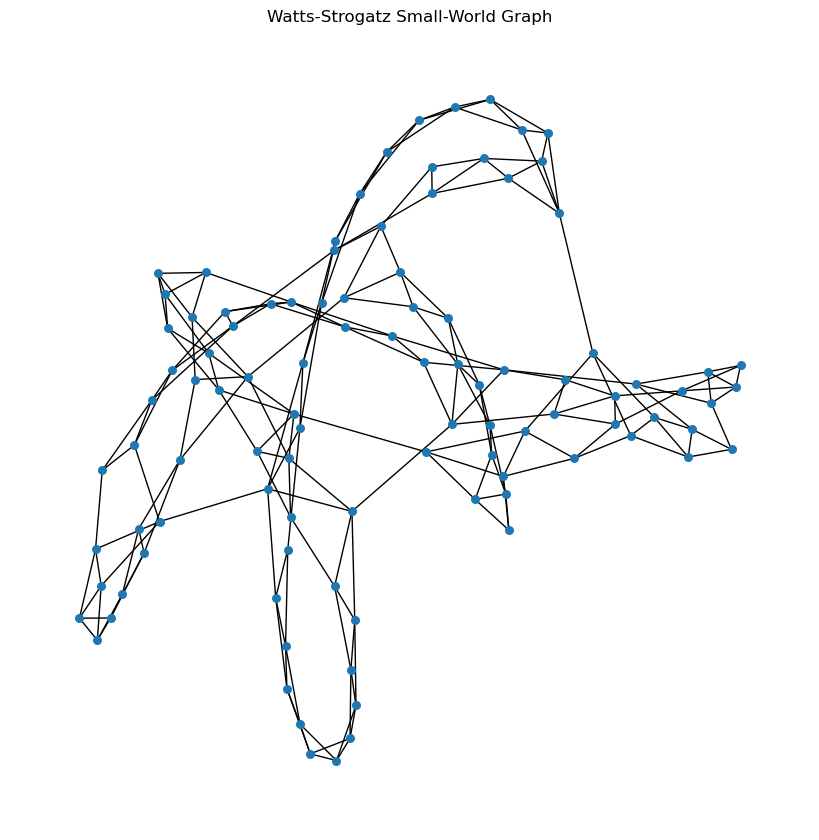

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# ノード数、次数、リンクの張替え確率を指定
num_nodes = 100
k = 4  # 各ノードの次数
p = 0.1  # リンクの張替え確率

# Watts-Strogatzスモールワールドグラフを生成
G = nx.watts_strogatz_graph(num_nodes, k, p)

# グラフの描画（オプション）
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=False, node_size=30)
plt.title("Watts-Strogatz Small-World Graph")
plt.show()

### 使わなかった場合

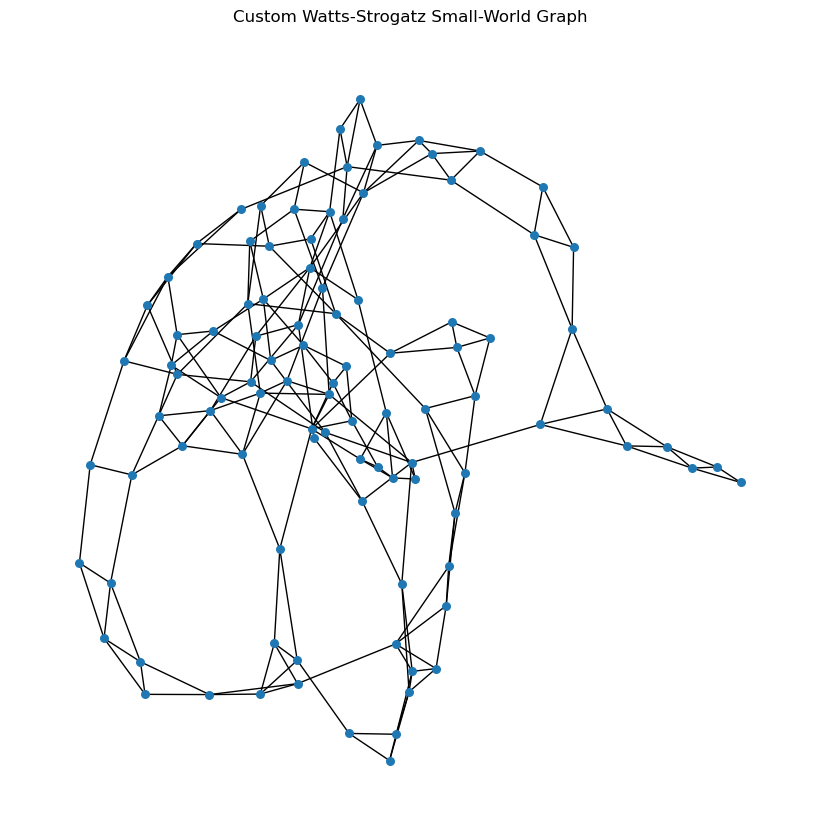

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ノード数、次数、リンクの張替え確率を指定
num_nodes = 100
k = 4  # 各ノードの次数
p = 0.1  # リンクの張替え確率

# サークルラッタイム（各ノードから始まるリンクの数）
k_ring = k // 2

# 1次元のサークルラッタイムを持つグラフを生成
G = nx.Graph()
nodes = list(range(num_nodes))
for node in nodes:
    for i in range(1, k_ring + 1):
        neighbor = (node + i) % num_nodes
        G.add_edge(node, neighbor)

# リンクの張替えを行う
for node in nodes:
    for edge in list(G.edges(node)):
        if np.random.rand() < p:
            # リンクの張替え
            G.remove_edge(*edge)
            new_neighbor = np.random.choice(nodes)
            while new_neighbor == node or G.has_edge(node, new_neighbor):
                new_neighbor = np.random.choice(nodes)
            G.add_edge(node, new_neighbor)

# グラフの描画（オプション）
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=False, node_size=30)
plt.title("Custom Watts-Strogatz Small-World Graph")
plt.show()

## Barabási–Albertのスケールフリーネットワーク

### 組み込み関数を使った場合

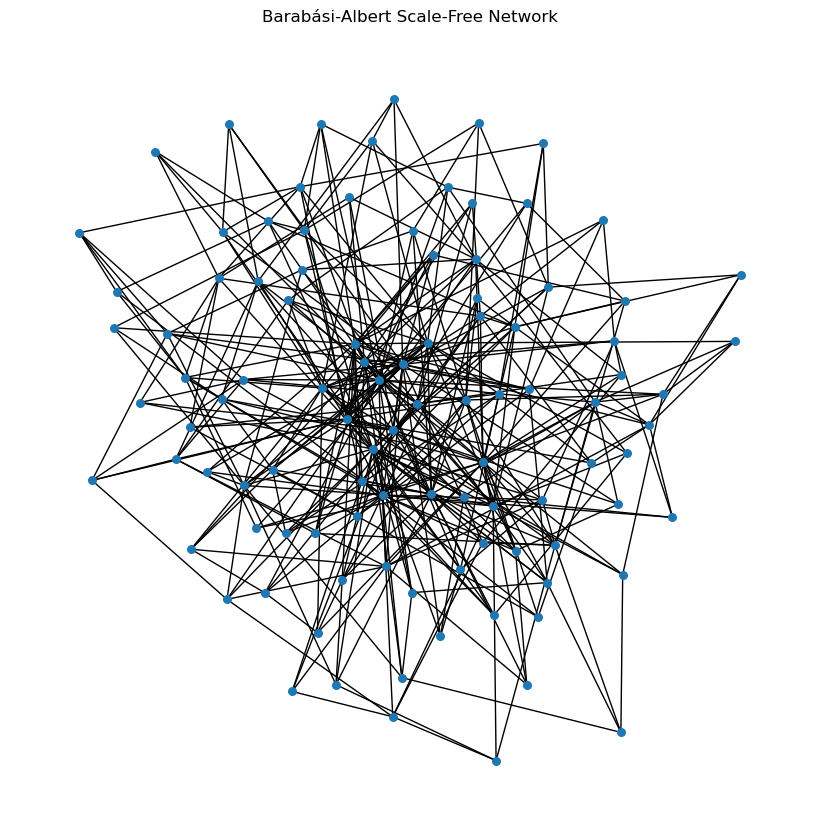

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# ノード数と各新ノードが接続する先の既存ノードの数を指定
num_nodes = 100
k = 4

# Barabási-Albertスケールフリーネットワークを生成
G = nx.barabasi_albert_graph(num_nodes, k)

# グラフの描画（オプション）
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=False, node_size=30)
plt.title("Barabási-Albert Scale-Free Network")
plt.show()

### 使わなかった場合

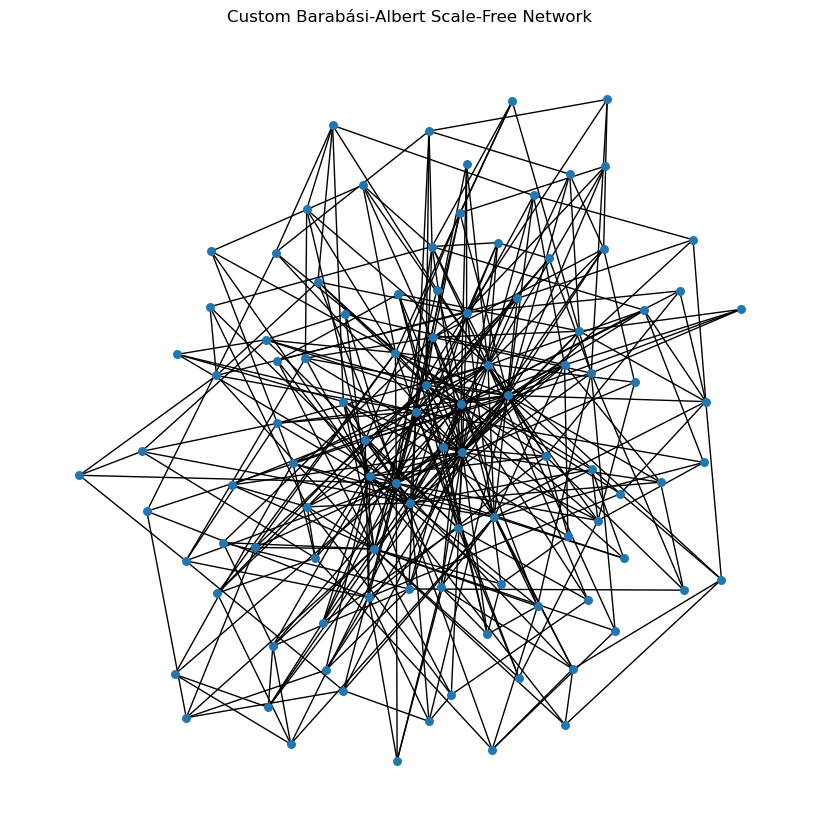

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# ノード数と各新ノードが接続する先の既存ノードの数を指定
num_nodes = 100
k = 4

# グラフを初期化
G = nx.Graph()

# 初期の完全グラフを生成
for i in range(k + 1):
    for j in range(i + 1, k + 1):
        G.add_edge(i, j)

# 新しいノードを追加して接続
for i in range(k + 1, num_nodes):
    targets = []
    degrees = list(dict(G.degree()).values())
    total_degree = sum(degrees)
    
    while len(targets) < k:
        # 次数に比例した確率で既存ノードを選択
        target = random.choices(list(G.nodes()), weights=[d/total_degree for d in degrees])[0]
        if target not in targets:
            targets.append(target)
    
    for target in targets:
        G.add_edge(i, target)
        degrees[target] += 1
        degrees.append(i)

# グラフの描画（オプション）
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=False, node_size=30)
plt.title("Custom Barabási-Albert Scale-Free Network")
plt.show()